In [1]:
import xtrack as xt
import xpart as xp
import matplotlib.pyplot as plt

Create a simple model of the LHC

In [2]:
lmap = xt.LineSegmentMap(length=26658.8831999989, qx=0.27, qy=0.295, dqx=15, dqy=15, longitudinal_mode='nonlinear',
    voltage_rf=4e6, frequency_rf=400e6, lag_rf=180, momentum_compaction_factor=3.225e-04, betx=1, bety=1)
line = xt.Line(elements=[lmap])
line.particle_ref = xt.Particles(mass0=xt.PROTON_MASS_EV, q0=1, energy0=450e9)

Compute the revolution period needed by the Schottky monitor

In [3]:
twiss = line.twiss()

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [4]:
schottky_monitor = xt.monitors.SchottkyMonitor(f_rev=1/twiss.T_rev0, schottky_harmonic=427_725, n_taylor=4)

In [5]:
line.discard_tracker()
line.append_element(element=schottky_monitor, name='Schottky monitor')
line.build_tracker()

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


Create a bunch of particles and track them for 10k turns

In [6]:
bunch = xp.generate_matched_gaussian_bunch(num_particles=int(1e4), nemitt_x=1.5e-6, nemitt_y=1.5e-6, line=line, total_intensity_particles=1e11, sigma_z=7e-2)

Ignoring collective elements in particles generation.


*** Maximum RMS bunch length 0.11812759635051139m.


/home/clannoy/miniconda3/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


... distance to target bunch length: -7.0000e-02
... distance to target bunch length: 4.4864e-02
... distance to target bunch length: 3.8881e-02
... distance to target bunch length: 8.5600e-03
... distance to target bunch length: -9.3055e-03
... distance to target bunch length: 4.5506e-04
... distance to target bunch length: -8.6681e-06
... distance to target bunch length: 2.2793e-08
... distance to target bunch length: -3.4673e-07
--> Bunch length: 0.07000002279329717


Ignoring collective elements in particles generation.


--> Emittance: 0.2489315037483315


In [7]:
line.track(bunch, num_turns=10000, with_progress=True)

Tracking:   0%|                                                                    | 0/10000 [00:00<?, ?it/s]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


Tracking: 100%|███████████████████████████████████████████████████████| 10000/10000 [00:26<00:00, 372.13it/s]


Process the data to build Schottky spectrum

In [8]:
schottky_monitor.process_spectrum(inst_spectrum_len=10000, deltaQ=5e-5, band_width=0.3, Qx=0.27, Qy=0.295, x=True, y=False, z=True)

lowerH band of Schottky spectrum processed
upperH band of Schottky spectrum processed
center band of Schottky spectrum processed
Maximal Talor truncation error in z plane to be compared against sqrt(PSD): 3.80657433491217e-20
Maximal Talor truncation error in x plane to be compared against sqrt(PSD): 5.190120322201753e-22


Since we only tracked 10_000 turns we have a single instataneous spectra

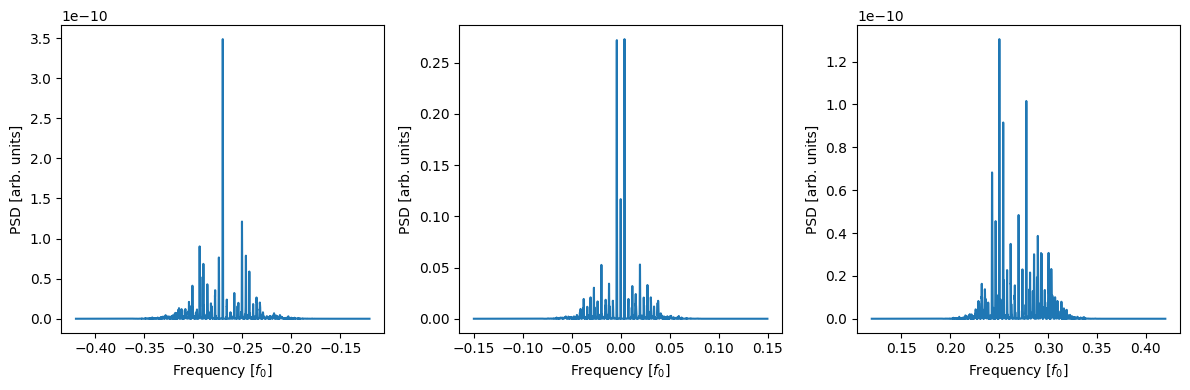

In [9]:
%matplotlib inline
plt.figure(figsize=(12,4))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
for ax, region in zip([ax1, ax2, ax3], ['lowerH', 'center', 'upperH']):
    ax.plot(schottky_monitor.frequencies[region], schottky_monitor.PSD_avg[region])
    ax.set_xlabel(f'Frequency [$f_0$]')
    ax.set_ylabel(f'PSD [arb. units]')
    #ax.set_yscale('log')
plt.tight_layout()

Tracking more turns to observe the mean value of the spectra 

In [17]:
line.track(bunch, num_turns=200_000, with_progress=True)

Tracking: 100%|█████████████████████████████████████████████████████| 100000/100000 [04:00<00:00, 415.31it/s]


We can now plot the average over 21 specta

In [18]:
schottky_monitor.process_spectrum(inst_spectrum_len=10000, deltaQ=5e-5, band_width=0.3, Qx=0.27, Qy=0.295, x=True, y=False, z=True)

lowerH band of Schottky spectrum processed
upperH band of Schottky spectrum processed
center band of Schottky spectrum processed
Maximal Talor truncation error in z plane to be compared against sqrt(PSD): 3.80657433491217e-20
Maximal Talor truncation error in x plane to be compared against sqrt(PSD): 5.190120322201753e-22


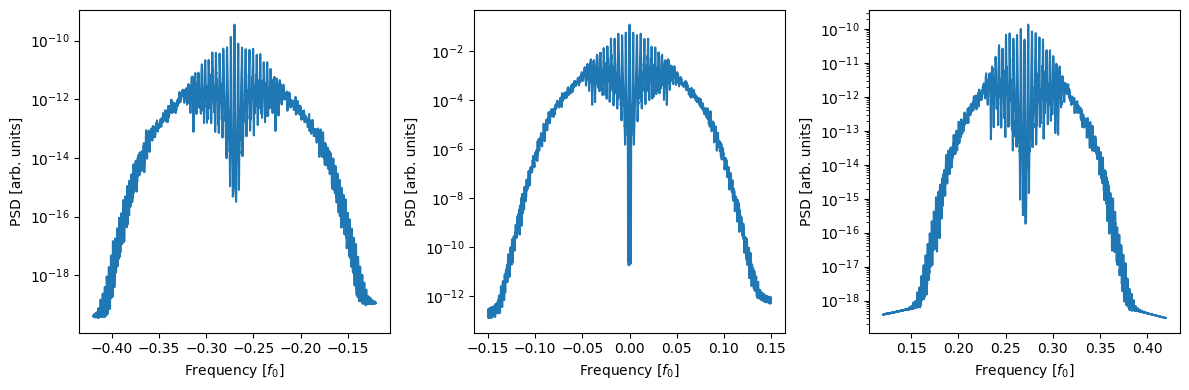

In [25]:
%matplotlib inline
plt.figure(figsize=(12,4))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
for ax, region in zip([ax1, ax2, ax3], ['lowerH', 'center', 'upperH']):
    ax.plot(schottky_monitor.frequencies[region], schottky_monitor.PSD_avg[region])
    ax.set_xlabel(f'Frequency [$f_0$]')
    ax.set_ylabel(f'PSD [arb. units]')
    ax.set_yscale('log')
plt.tight_layout()

Compute shottky spectrum for different processing parameters (but same tracking) 

In [26]:
schottky_monitor.clear_spectrum()
schottky_monitor.process_spectrum(inst_spectrum_len=5000, deltaQ=5e-5, band_width=0.1, Qx=0.27, Qy=0.295, x=True, y=False, z=True)

lowerH band of Schottky spectrum processed
upperH band of Schottky spectrum processed
center band of Schottky spectrum processed
Maximal Talor truncation error in z plane to be compared against sqrt(PSD): 4.693176884032811e-22
Maximal Talor truncation error in x plane to be compared against sqrt(PSD): 1.749522590303493e-22


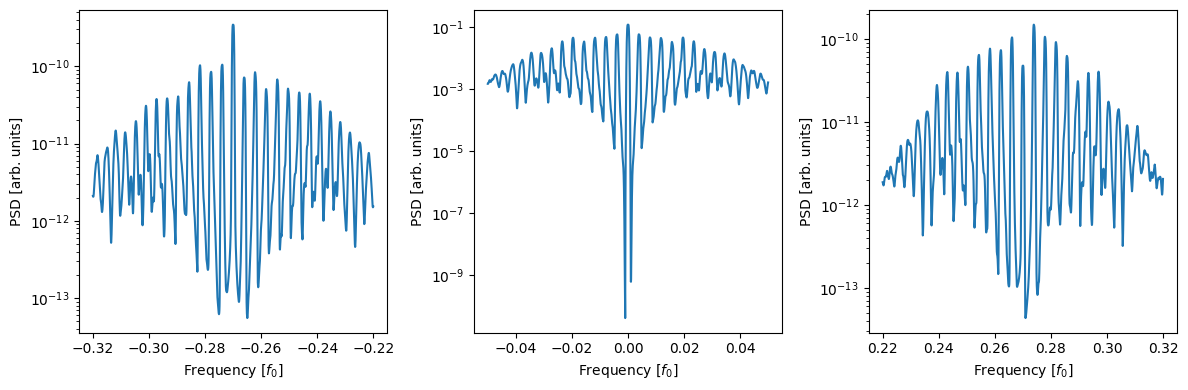

In [27]:
%matplotlib inline
plt.figure(figsize=(12,4))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
for ax, region in zip([ax1, ax2, ax3], ['lowerH', 'center', 'upperH']):
    ax.plot(schottky_monitor.frequencies[region], schottky_monitor.PSD_avg[region])
    ax.set_xlabel(f'Frequency [$f_0$]')
    ax.set_ylabel(f'PSD [arb. units]')
    #ax.set_yscale('log')
plt.tight_layout()